# Extracción de Datos de CO2

In [1]:
# Importamos las bibliotecas que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
mediciones = np.array([])    # (ppm)

In [243]:
# Definamos la carpeta con las mediciones como PATH
PATH = "./measurements/CO2/2021-10-13_16-23-39"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [244]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_1.csv", sep=',')
display(df0)

,Date_Time,CO2
0,13/10/2021_16:32:03,621
1,13/10/2021_16:32:08,619
2,13/10/2021_16:32:13,619
3,13/10/2021_16:32:18,767
4,13/10/2021_16:32:23,837
...,...,...
95,13/10/2021_16:40:00,0
96,13/10/2021_16:40:05,0
97,13/10/2021_16:40:10,0
98,13/10/2021_16:40:15,0


In [245]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

13/10/2021_16:32:03


In [246]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

47


In [248]:
# Llenemos las listas con los datos
for i in range(n):
    df = pd.read_csv(f"{PATH}/data_{i}.csv", sep=',')

    # CO2
    mediciones = np.concatenate((mediciones, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))

EmptyDataError: No columns to parse from file

# Gráficos

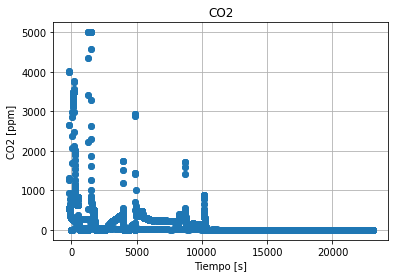

In [242]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, mediciones, "o")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
plt.savefig(f"{PATH}/figuras/CO2.png")
plt.show()

#### Improvisación para medir unos datos del 13/10
me tiraba un error que me daba paja revisar así que ya fue, hice esto otro que era rapidito

In [221]:
df0_1 = pd.read_csv(f"{PATH}/data_16.csv", sep=',')
data_1=df0_1.CO2.to_numpy()
df0_2 = pd.read_csv(f"{PATH}/data_17.csv", sep=',')
data_2=df0_2.CO2.to_numpy()

data=np.concatenate([data_1,data_2])

#data=df0.CO2.to_numpy()
tiempo=np.arange(0,5*len(data),5)

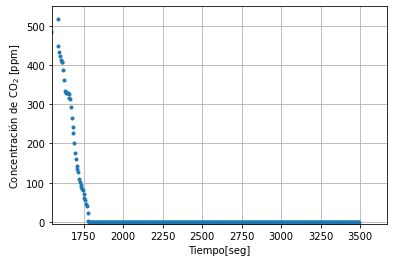

In [232]:
plt.plot(tiempo,data,'.')
plt.grid(True)
plt.xlabel('Tiempo[seg]')
plt.ylim(-5,550)
plt.xlim(1550,)
plt.ylabel('Concentración de CO$_2$ [ppm]')
plt.show()

In [149]:
len(data)

100